# Exploratory Data Analysis on E-commerce Dataset

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',100)
from sklearn.preprocessing import MinMaxScaler ,StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
FashionDataset_orig=pd.read_csv(r'FashionDataset.csv')
FashionDataset = FashionDataset_orig.copy()
FashionDataset.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [7]:
FashionDataset.columns

Index(['Unnamed: 0', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

In [8]:
FashionDataset.drop(FashionDataset.columns[0],inplace=True,axis=1)

# As the first column is index and is a copy of the actual index, it can be dropped

In [9]:
FashionDataset.shape

(30758, 7)

In [10]:
FashionDataset.head()


,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [11]:
FashionDataset.dtypes

# As observed above, MRP, SellPrice and Discount are also of data type Object. 
# The other columns are categorical, so encoding is required

BrandName    object
Deatils      object
Sizes        object
MRP          object
SellPrice    object
Discount     object
Category     object
dtype: object

In [12]:
FashionDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  30758 non-null  object
 1   Deatils    30758 non-null  object
 2   Sizes      30758 non-null  object
 3   MRP        30758 non-null  object
 4   SellPrice  30758 non-null  object
 5   Discount   30758 non-null  object
 6   Category   30758 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [13]:
FashionDataset['MRP']=FashionDataset['MRP'].str.replace('Rs\n',"")
FashionDataset['MRP']=FashionDataset['MRP'].str.replace('Nan',"")
FashionDataset['MRP']=pd.to_numeric(FashionDataset['MRP'])

FashionDataset['Discount']=FashionDataset['Discount'].str.replace('% off',"")
FashionDataset['Discount']=FashionDataset['Discount'].str.replace('Nan',"")
FashionDataset['Discount']=pd.to_numeric(FashionDataset['Discount'])
# Converting MRP and Discount to numerical data types and Nan have to be removed first before converting 

In [14]:
filter_sp = FashionDataset['SellPrice'].str.contains('Nan')
FashionDataset[filter_sp].shape
FashionDataset = FashionDataset[~filter_sp]
FashionDataset['SellPrice']=pd.to_numeric(FashionDataset['SellPrice'])

# Removing rows which have null values in sell price as there are not many rows which have null values

In [15]:
FashionDataset.describe()

# From the table below, it can be observed that there might be outliers in columns MRP an SellPrice
# There are missing values in columns MRP and Discount as well

,MRP,SellPrice,Discount
count,22550.000000,29575.000000,22550.000000
mean,2644.677295,1923.680642,44.894856
std,2322.499186,3049.333237,15.023121
min,149.000000,74.000000,0.000000
25%,1399.000000,749.000000,30.000000
50%,1999.000000,1209.000000,50.000000
75%,3099.000000,2069.000000,55.000000
max,32995.000000,142500.000000,85.000000


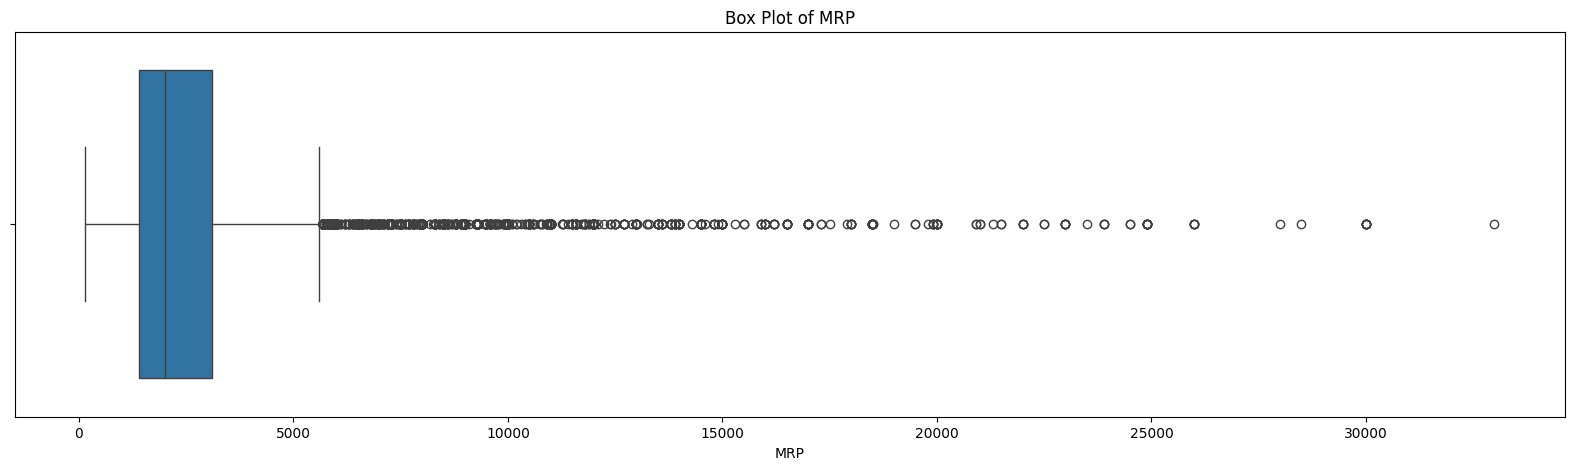

In [16]:
plt.figure(figsize=(20,5))
sns.boxplot(x = FashionDataset['MRP'])
plt.title('Box Plot of MRP')
plt.xlabel('MRP')
plt.show()

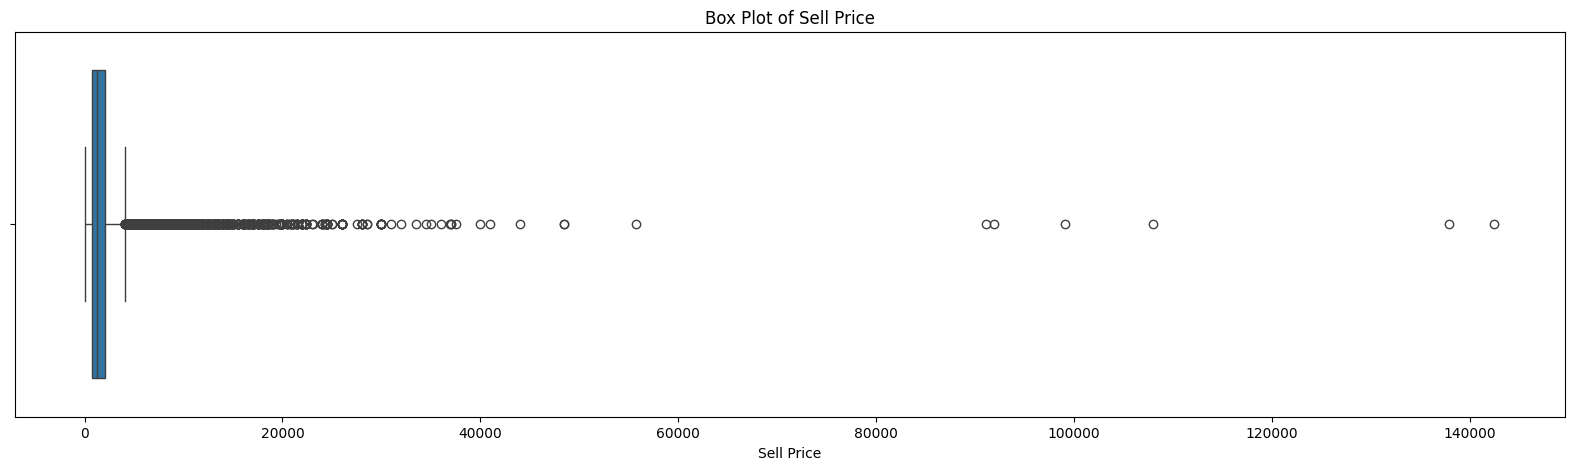

In [17]:
plt.figure(figsize=(20,5))
sns.boxplot(x = FashionDataset['SellPrice'])
plt.title('Box Plot of Sell Price')
plt.xlabel('Sell Price')
plt.show()

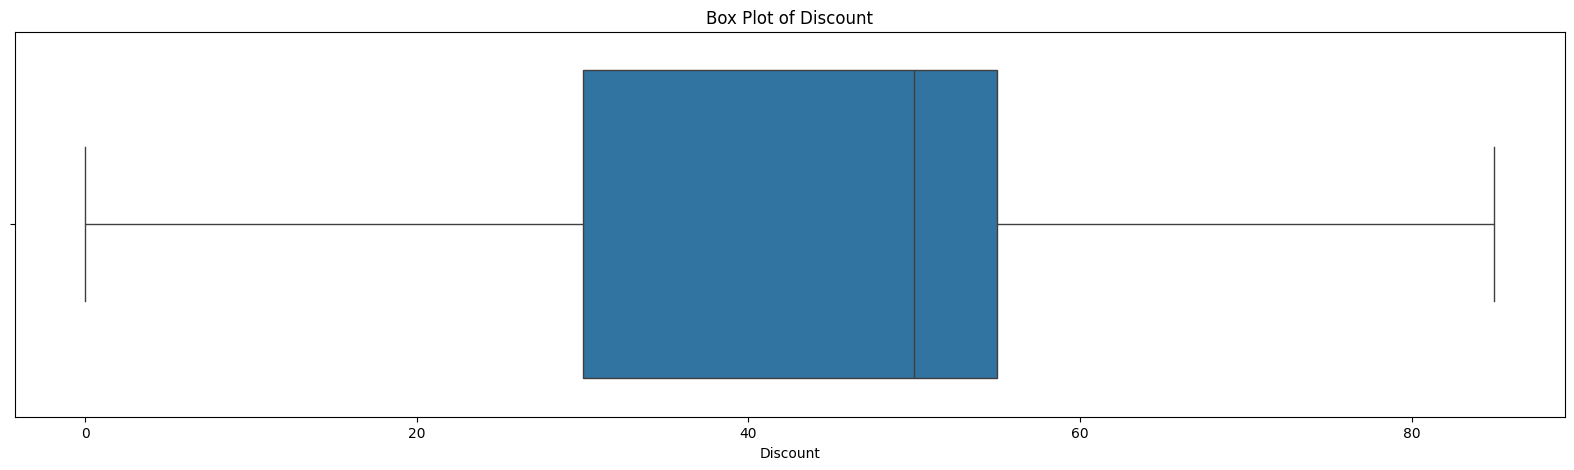

In [18]:
plt.figure(figsize=(20,5))
sns.boxplot(x = FashionDataset['Discount'])
plt.title('Box Plot of Discount')
plt.xlabel('Discount')
plt.show()

In [19]:
# As seen in the above box plots, columns SellPrice and MRP have outliers

In [20]:
# Getting outlier limits for both SellPrice and MRP

num_cols = FashionDataset[['MRP','SellPrice']]
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
print('lower bounds are:\n',lower_bound)
print('-'*70)
print('upper bounds are:\n',upper_bound)

lower bounds are:
 MRP         -1151.0
SellPrice   -1231.0
dtype: float64
----------------------------------------------------------------------
upper bounds are:
 MRP          5649.0
SellPrice    4049.0
dtype: float64


In [22]:
filter_mrp = FashionDataset[(FashionDataset['MRP'] < -1151) | (FashionDataset['MRP'] > 5649)]
print(filter_mrp.shape)
FashionDataset = FashionDataset[((FashionDataset['MRP']>-1151) & (FashionDataset['MRP']<5649)) | (FashionDataset['MRP'].isnull()) ]

# Dropping the rows having outliers in MRP as number of rows are less

(1431, 7)


In [23]:
filter_sp = FashionDataset[(FashionDataset['SellPrice'] < -1231) | (FashionDataset['SellPrice'] > 4049)]
filter_sp.shape

FashionDataset = FashionDataset[(FashionDataset['SellPrice']>-1231) & (FashionDataset['SellPrice']<4049) | (FashionDataset['MRP'].isnull())]

# Dropping the rows having outliers in MRP as number of rows are less

In [24]:
FashionDataset[FashionDataset.duplicated()].count()

BrandName    1526
Deatils      1526
Sizes        1526
MRP          1247
SellPrice    1526
Discount     1247
Category     1526
dtype: int64

In [25]:
FashionDataset.drop_duplicates(inplace=True)

# Removing duplicates

In [26]:
FashionDataset.shape

(26559, 7)

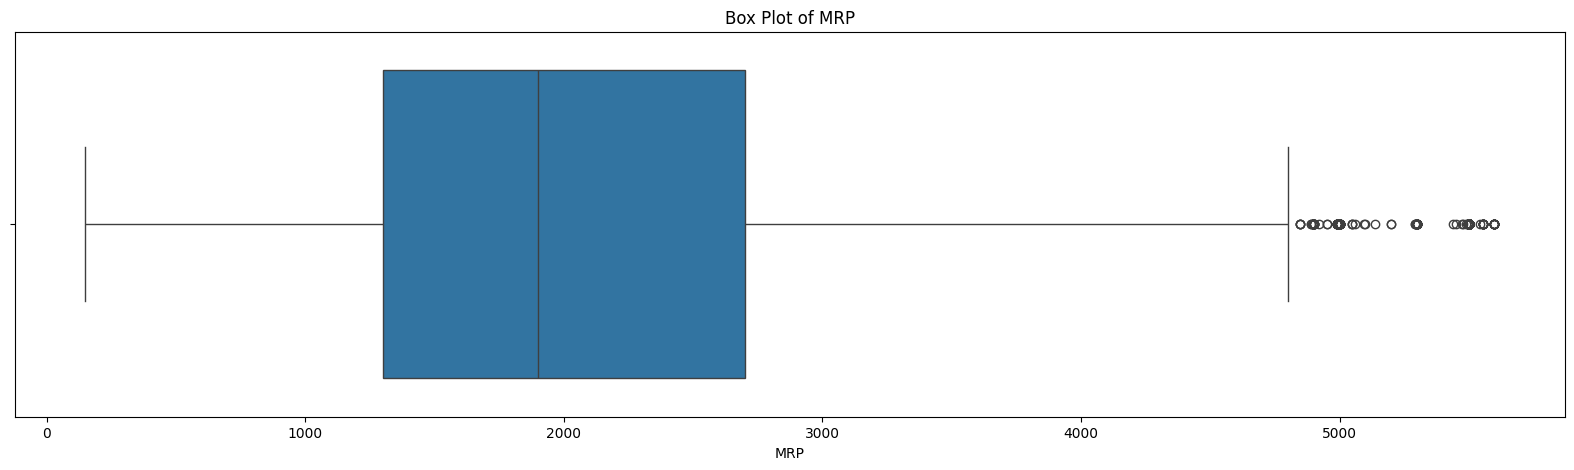

In [27]:
plt.figure(figsize=(20,5))
sns.boxplot(x = FashionDataset['MRP'])
plt.title('Box Plot of MRP')
plt.xlabel('MRP')
plt.show()

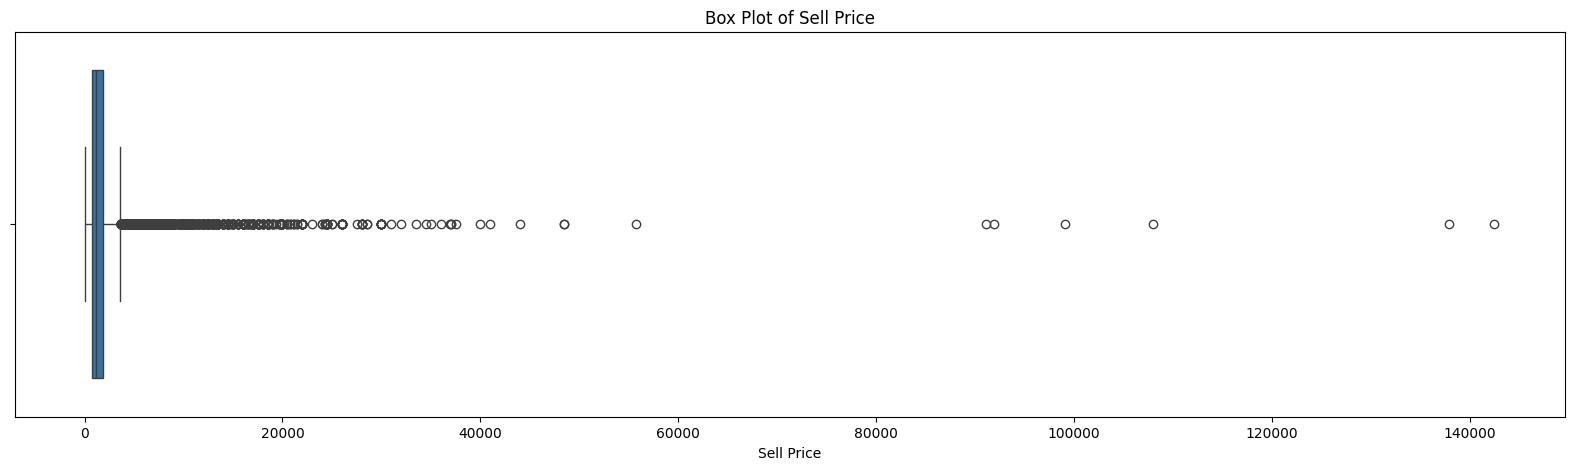

In [28]:
plt.figure(figsize=(20,5))
sns.boxplot(x = FashionDataset['SellPrice'])
plt.title('Box Plot of Sell Price')
plt.xlabel('Sell Price')
plt.show()

In [29]:
num_cols = FashionDataset[['MRP','SellPrice']]
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
print('lower bounds are:\n',lower_bound)
print('-'*70)
print('upper bounds are:\n',upper_bound)

lower bounds are:
 MRP          -802.5
SellPrice   -1036.0
dtype: float64
----------------------------------------------------------------------
upper bounds are:
 MRP          4801.5
SellPrice    3644.0
dtype: float64


In [31]:
filter_mrp = FashionDataset[(FashionDataset['MRP'] < -802.5) | (FashionDataset['MRP'] > 4801.5)]
print(filter_mrp.shape)
FashionDataset = FashionDataset[((FashionDataset['MRP']>-802.5) & (FashionDataset['MRP']<4801.5)) | (FashionDataset['MRP'].isnull()) ]

# FashionDataset = FashionDataset[~filter_mrp]
# Dropping the rows having outliers in MRP as number of rows are less

(595, 7)


In [32]:
filter_sp = FashionDataset[(FashionDataset['SellPrice'] < -1036) | (FashionDataset['SellPrice'] > 3644)]
print(filter_sp.shape)

FashionDataset = FashionDataset[(FashionDataset['SellPrice']>-1036) & (FashionDataset['SellPrice']<3644) | (FashionDataset['MRP'].isnull())]

# Dropping the rows having outliers in MRP as number of rows are less

(1646, 7)


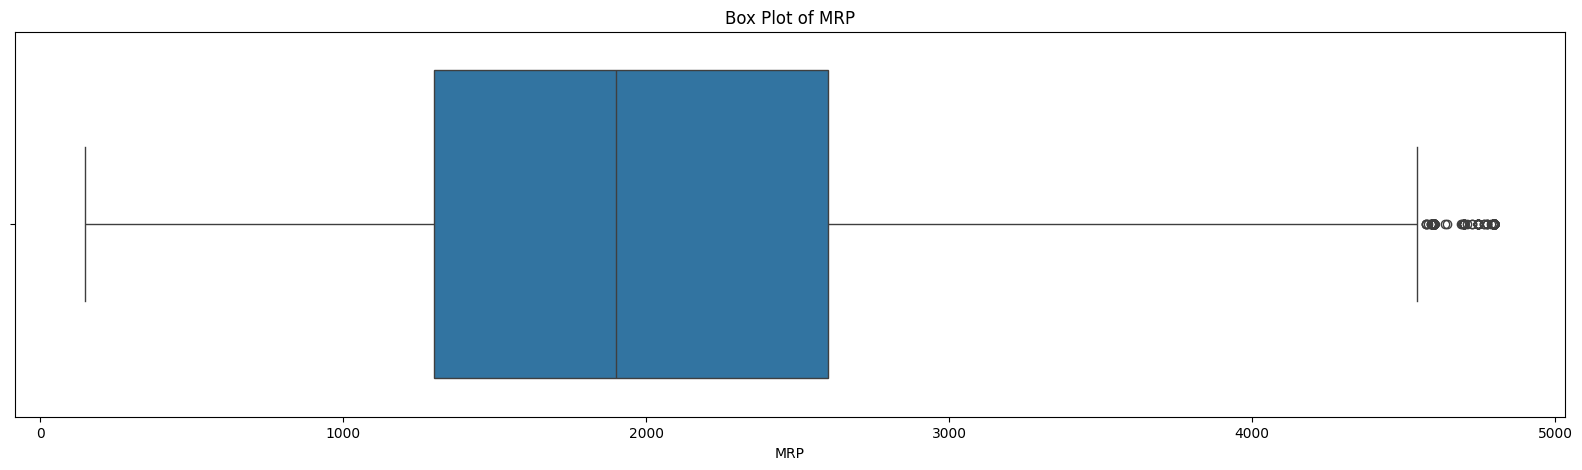

In [33]:
plt.figure(figsize=(20,5))
sns.boxplot(x = FashionDataset['MRP'])
plt.title('Box Plot of MRP')
plt.xlabel('MRP')
plt.show()

# These outliers can be ignored as they are close to upper bound

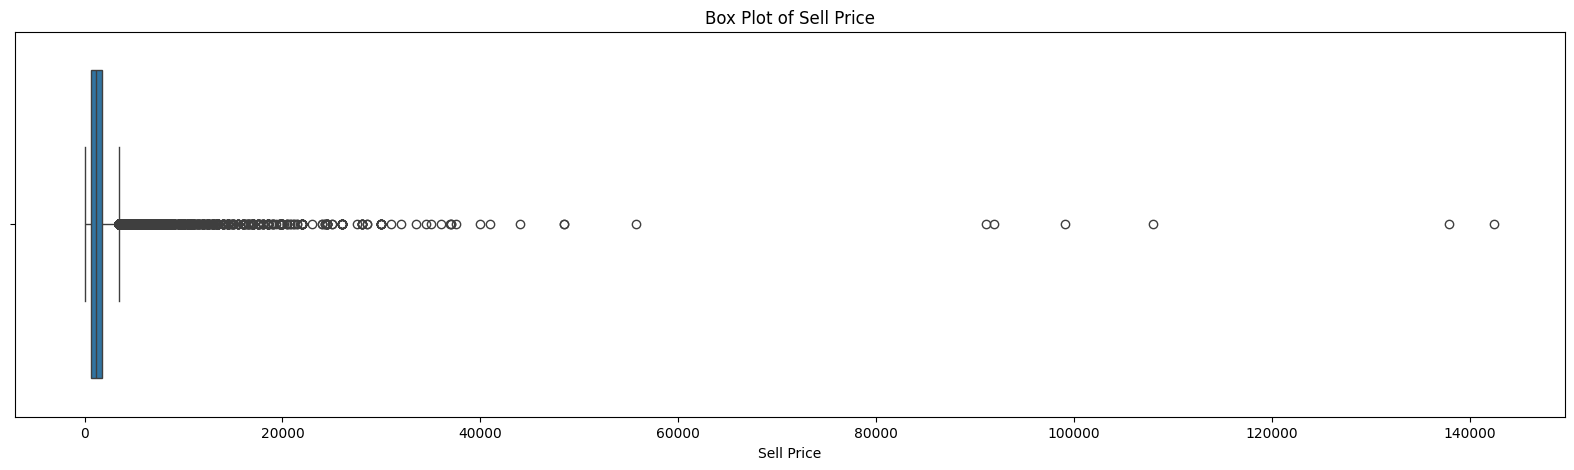

In [34]:
plt.figure(figsize=(20,5))
sns.boxplot(x = FashionDataset['SellPrice'])
plt.title('Box Plot of Sell Price')
plt.xlabel('Sell Price')
plt.show()

In [35]:
# As there are still outliers, we will cap the max value of selling price

FashionDataset.loc[FashionDataset['SellPrice'] > 3644,'SellPrice'] = 3644

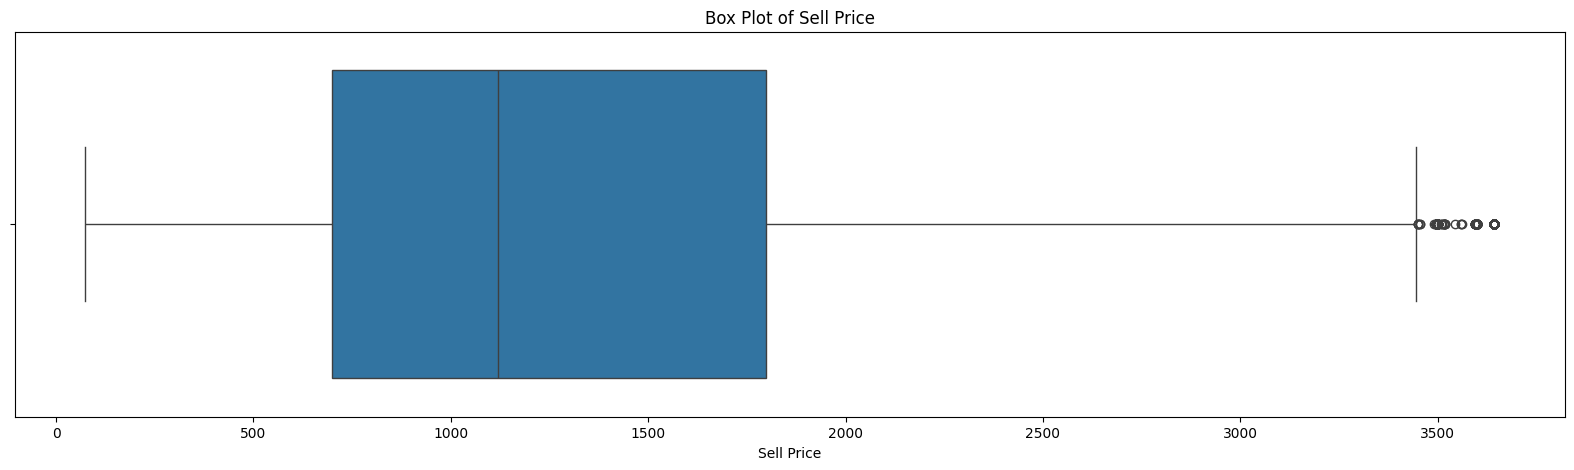

In [36]:
plt.figure(figsize=(20,5))
sns.boxplot(x = FashionDataset['SellPrice'])
plt.title('Box Plot of Sell Price')
plt.xlabel('Sell Price')
plt.show()

# These outliers can be ignored as they are close to upper bound

#### Removing missing values

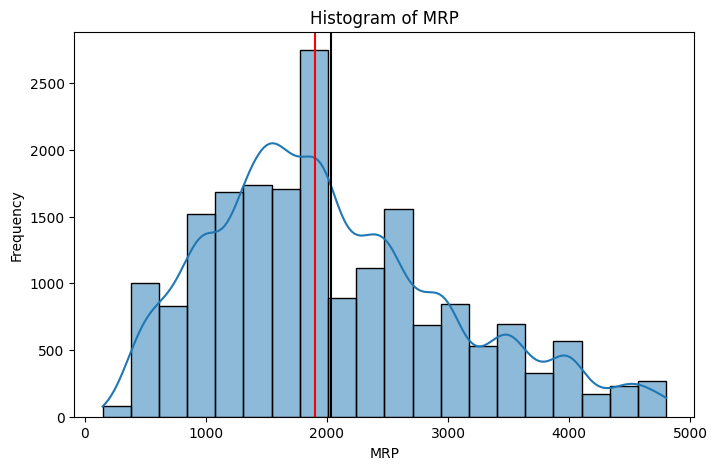

0.6381554073904929

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(FashionDataset['MRP'], bins=20, kde=True)
plt.title('Histogram of MRP')
plt.xlabel('MRP')
plt.ylabel('Frequency')
plt.axvline(FashionDataset.MRP.mean(), color='black')
plt.axvline(FashionDataset.MRP.median(), color='red')
plt.show()

FashionDataset['MRP'].skew()

In [38]:
# As the column MRP is moderately skewed, median can be taken to replace the null values

FashionDataset['MRP'].fillna(value=FashionDataset['MRP'].median(),inplace=True)


C:\Users\Praveen\AppData\Local\Temp\ipykernel_21588\91899742.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  FashionDataset['MRP'].fillna(value=FashionDataset['MRP'].median(),inplace=True)


In [39]:
FashionDataset['Discount'] = FashionDataset['Discount'].apply(lambda x: x).round(1)

In [40]:
FashionDataset.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",1699.0,849,50.0,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",3499.0,2449,30.0,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",1199.0,599,50.0,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",2299.0,1379,40.0,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",1699.0,849,50.0,Westernwear-Women


In [41]:
FashionDataset[['Wear_type','Gender']]=FashionDataset.Category.str.split('-',expand=True)

In [42]:
FashionDataset.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category,Wear_type,Gender
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",1699.0,849,50.0,Westernwear-Women,Westernwear,Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",3499.0,2449,30.0,Westernwear-Women,Westernwear,Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",1199.0,599,50.0,Westernwear-Women,Westernwear,Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",2299.0,1379,40.0,Westernwear-Women,Westernwear,Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",1699.0,849,50.0,Westernwear-Women,Westernwear,Women


In [43]:
FashionDataset['Wear_type'].value_counts()

Wear_type
Westernwear           9644
Indianwear            8221
Lingerie&Nightwear    3153
Footwear              2163
Jewellery             1468
Watches                893
Fragrance              393
Name: count, dtype: int64

In [44]:
FashionDataset['Gender'].value_counts()

Gender
Women    25935
Name: count, dtype: int64

In [45]:
FashionDataset.drop(['Category','Gender'],axis=1,inplace=True)
FashionDataset.rename(columns={'Wear_type':'Category'},inplace=True)

In [46]:
FashionDataset.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",1699.0,849,50.0,Westernwear
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",3499.0,2449,30.0,Westernwear
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",1199.0,599,50.0,Westernwear
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",2299.0,1379,40.0,Westernwear
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",1699.0,849,50.0,Westernwear


In [47]:
FashionDataset['Sizes'].value_counts()

Sizes
Nan                                                                                                                                                         3895
Size:Large,Medium,Small,X-Large,X-Small                                                                                                                     1908
Size:Large,Medium,Small,X-Large                                                                                                                             1564
Size:Large,Medium,Small,X-Large,X-Small,XX-Large                                                                                                            1436
Size:Large,Medium,Small,X-Large,XX-Large                                                                                                                    1335
                                                                                                                                                            ... 
Size:32-C,34-C,36-B,36-C,40-

In [48]:
FashionDataset.drop(columns=['Deatils','Sizes'],inplace=True)

# Number of unique details and sizes are high in both these columns, so these columns can be dropped

In [49]:
FashionDataset.head()

,BrandName,MRP,SellPrice,Discount,Category
0,life,1699.0,849,50.0,Westernwear
1,only,3499.0,2449,30.0,Westernwear
2,fratini,1199.0,599,50.0,Westernwear
3,zink london,2299.0,1379,40.0,Westernwear
4,life,1699.0,849,50.0,Westernwear


<Axes: >

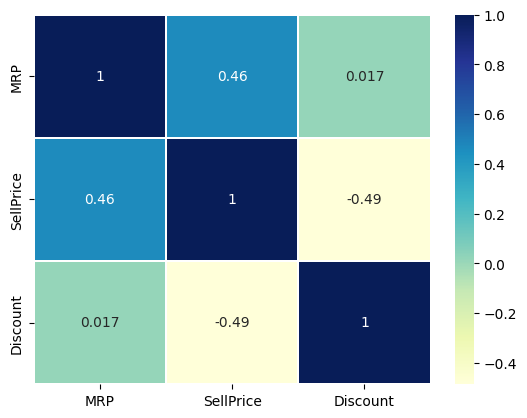

In [51]:
FashionDataset_corr = sns.heatmap(FashionDataset[['MRP','SellPrice','Discount']].corr(),annot=True,cmap ="YlGnBu",linewidths = 0.1)
FashionDataset_corr

In [52]:
# As seen in the above heat map, correlation between columns is not very high.

### EDA

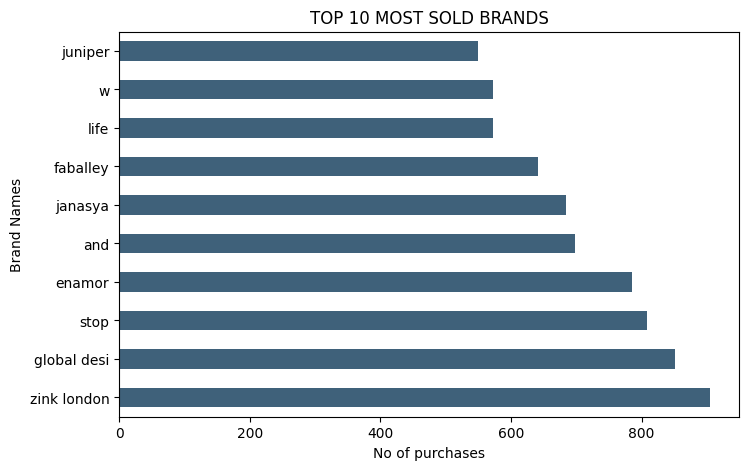

In [139]:
# What are the top 10 selling brands?

most_sold_brands = FashionDataset['BrandName'].value_counts().nlargest(10)
plt.figure(figsize=(8, 5))
most_sold_brands.plot(kind = 'barh',color='#3F617A')
plt.title('TOP 10 MOST SOLD BRANDS')
plt.ylabel('Brand Names')
plt.xlabel('No of purchases')
plt.show()

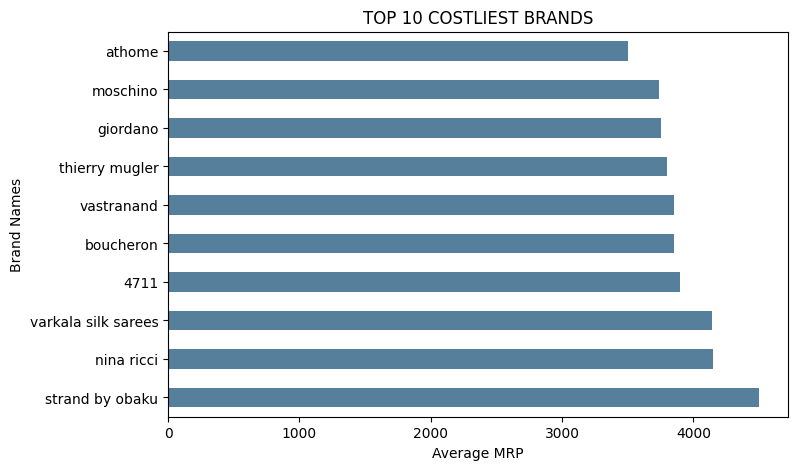

In [54]:
# Which are the top 10 costliest brands ( As per MRP)?

most_costliest_brands = FashionDataset.groupby(by='BrandName')['MRP'].mean().nlargest(10)

plt.figure(figsize=(8, 5))
most_costliest_brands.plot(kind = 'barh',color='#567F9B')
plt.title('TOP 10 COSTLIEST BRANDS')
plt.ylabel('Brand Names')
plt.xlabel('Average MRP')
plt.show()

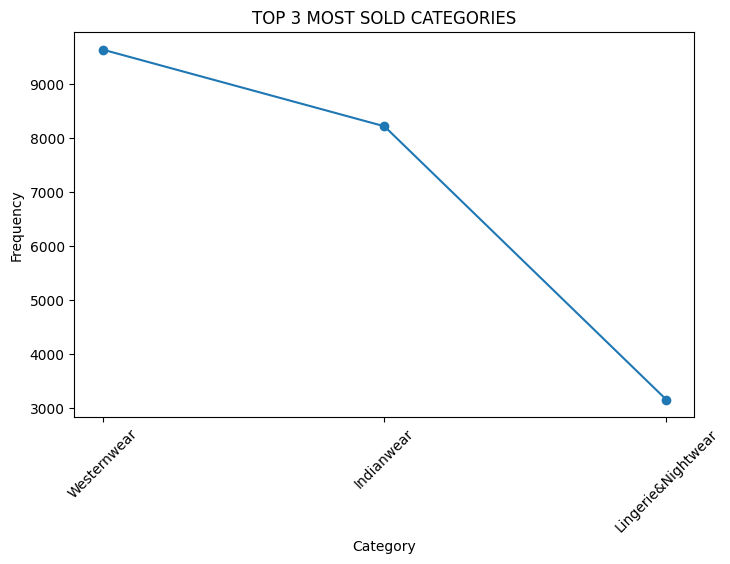

In [144]:
# Which category was sold the most?

most_sold_category = FashionDataset['Category'].value_counts()[:3]

plt.figure(figsize=(8, 5))
most_sold_category.plot(kind='line', marker='o')
plt.title('TOP 3 MOST SOLD CATEGORIES')
plt.ylabel('Frequency')
plt.xlabel('Category')
plt.xticks(range(len(most_sold_category.index)), most_sold_category.index, rotation=45)
plt.show()

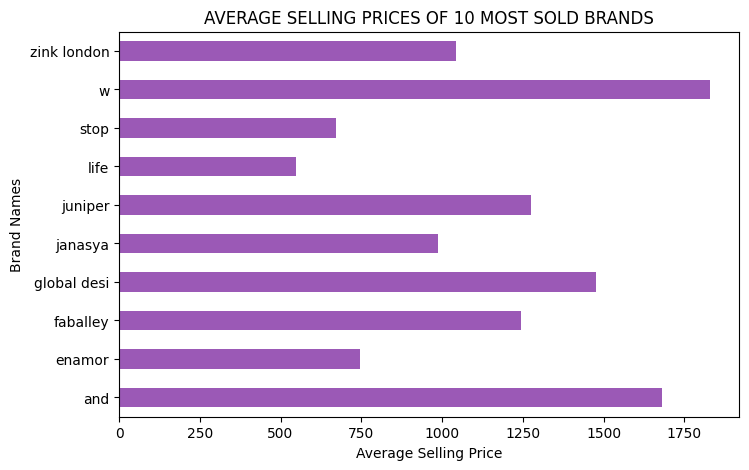

In [56]:
# Of the top 10 most sold brands, what are the average selling prices?


top_10_brands = FashionDataset[FashionDataset['BrandName'].isin(most_sold_brands.index)]
avg_sp_most_sold = top_10_brands.groupby('BrandName')['SellPrice'].mean()


plt.figure(figsize=(8, 5))
avg_sp_most_sold.plot(kind = 'barh',color='#9B59B6')
plt.title('AVERAGE SELLING PRICES OF 10 MOST SOLD BRANDS')
plt.ylabel('Brand Names')
plt.xlabel('Average Selling Price')
plt.show()

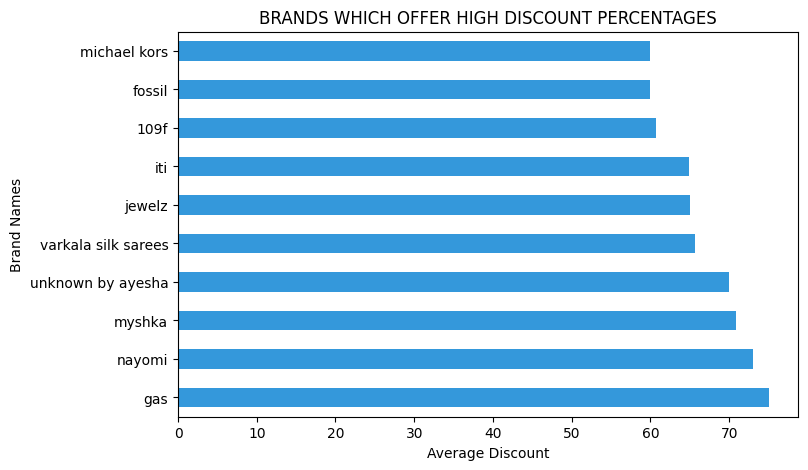

In [57]:
# Which brand offers the most discount percentages (provide top 10 brands most sold)?

highest_dis_by_brands = FashionDataset.groupby(by = 'BrandName')['Discount'].mean().nlargest(10)

plt.figure(figsize=(8, 5))
highest_dis_by_brands.plot(kind = 'barh',color = '#3498DB')
plt.title('BRANDS WHICH OFFER HIGH DISCOUNT PERCENTAGES')
plt.ylabel('Brand Names')
plt.xlabel('Average Discount')
plt.show()

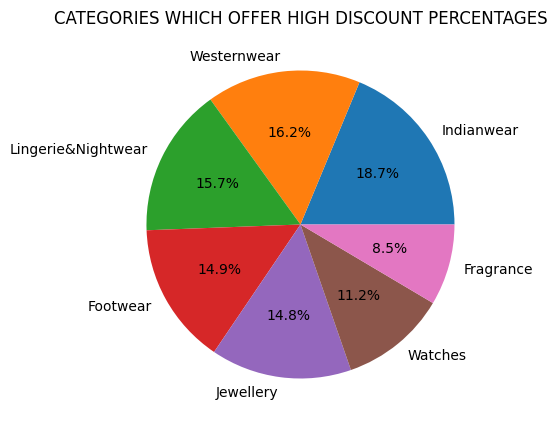

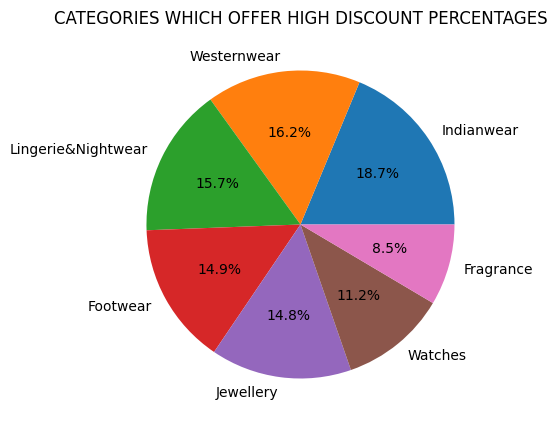

In [147]:
# Which category has the highest percentages of discount?

highest_dis_by_category = FashionDataset.groupby(by = 'Category')['Discount'].mean().nlargest(10)

plt.figure(figsize=(8, 5))
highest_dis_by_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('CATEGORIES WHICH OFFER HIGH DISCOUNT PERCENTAGES')
plt.ylabel('')
plt.show()

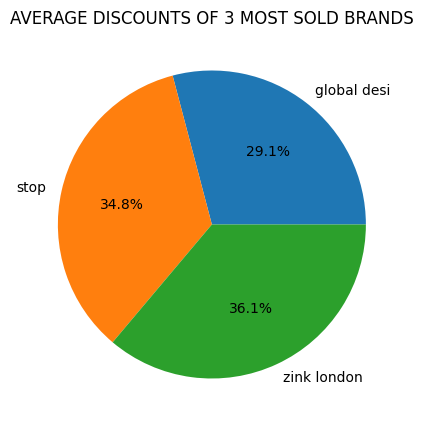

In [142]:
# How is the discount varying with respect to the category in top 3 most sold brands?

most_sold_3_brands = FashionDataset['BrandName'].value_counts().nlargest(3)
top_3_brands = FashionDataset[FashionDataset['BrandName'].isin(most_sold_3_brands.index)]
avg_dis_most_sold = top_3_brands.groupby('BrandName')['Discount'].mean()

plt.figure(figsize=(8, 5))
avg_dis_most_sold.plot(kind='pie', autopct='%1.1f%%')
plt.title('AVERAGE DISCOUNTS OF 3 MOST SOLD BRANDS')
plt.ylabel('')
plt.show()


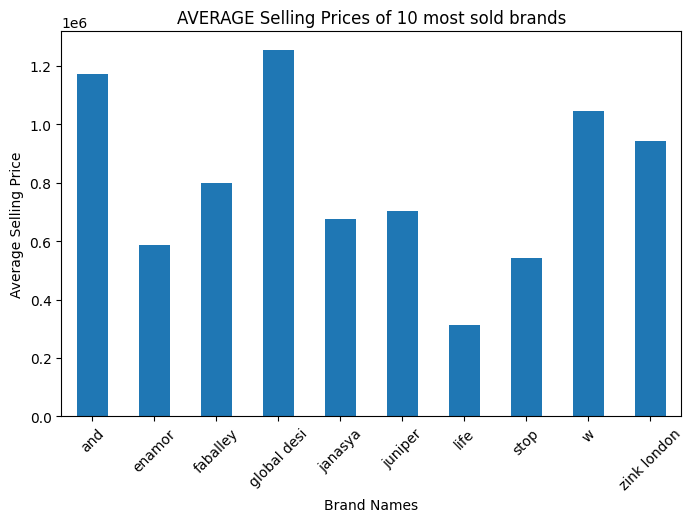

In [138]:
most_sold_brands = list(FashionDataset['BrandName'].value_counts().nlargest(10).index)
most_sold_and_revenue = FashionDataset[FashionDataset['BrandName'].isin(most_sold_brands)].groupby('BrandName')['SellPrice'].sum()

plt.figure(figsize=(8 , 5))
most_sold_and_revenue.plot(kind = 'bar')
plt.title('AVERAGE Selling Prices of 10 most sold brands')
plt.xlabel('Brand Names')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

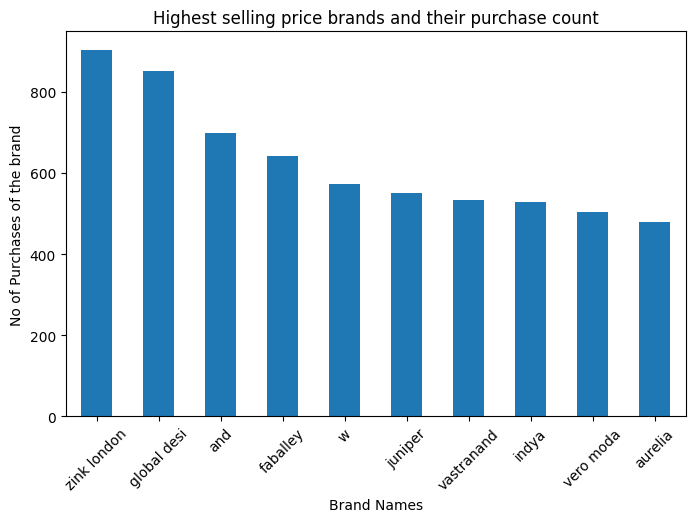

In [148]:
most_revenue_brands = FashionDataset.groupby('BrandName')['SellPrice'].sum().nlargest(10).index
most_revenue_brands_count = FashionDataset[FashionDataset['BrandName'].isin(most_revenue_brands)]['BrandName'].value_counts()

plt.figure(figsize=(8, 5))
most_revenue_brands_count.plot(kind = 'bar')
plt.title('Highest selling price brands and their purchase count')
plt.xlabel('Brand Names')
plt.ylabel('No of Purchases of the brand')
plt.xticks(rotation=45)
plt.show()